In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np

In [3]:
#Dataset link: https://www.kaggle.com/datasets/venky73/spam-mails-dataset?select=spam_ham_dataset.csv
spam_df = pd.read_csv('/content/drive/My Drive/NLP_research/spam.csv')
spam_df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [4]:
#cleaning the text column
spam_df['clean_text'] = spam_df['text'].map(lambda name:name.replace('\n',". ").replace('\r',''))

In [5]:
spam_df.head()

,Unnamed: 0,label,text,label_num,clean_text
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,Subject: enron methanol ; meter # : 988291. th...
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,"Subject: hpl nom for january 9 , 2001. ( see a..."
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,"Subject: neon retreat. ho ho ho , we ' re arou..."
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,"Subject: photoshop , windows , office . cheap ..."
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,Subject: re : indian springs. this deal is to ...


In [6]:
spam_df.shape

(5171, 5)

In [7]:
spam_df['label_num'].value_counts()

0    3672
1    1499
Name: label_num, dtype: int64

In [8]:
#We will select 250 rows for both spam and non spam

In [9]:
spam_mails = spam_df[spam_df['label_num']==1].sample(n = 250, random_state = 7)

In [10]:
non_spam_mails = spam_df[spam_df['label_num']==0].sample(n = 250, random_state = 7)

In [11]:
spam_df_final = pd.concat([spam_mails,non_spam_mails])

In [12]:
spam_df_final.head()

,Unnamed: 0,label,text,label_num,clean_text
1347,4423,spam,Subject: is your wife in pain\r\nstop the pain...,1,Subject: is your wife in pain. stop the pain. ...
191,4619,spam,Subject: young sluts getting creamy facials fo...,1,Subject: young sluts getting creamy facials fo...
3971,4789,spam,Subject: real - time alert for hot stock featu...,1,Subject: real - time alert for hot stock featu...
3961,5032,spam,Subject: craving for rolexes or omegas ?\r\nem...,1,Subject: craving for rolexes or omegas ?. empt...
4499,4239,spam,"Subject: try cortizyte , a revolutionary weigh...",1,"Subject: try cortizyte , a revolutionary weigh..."


In [13]:
spam_df_final['label_num'].value_counts()

1    250
0    250
Name: label_num, dtype: int64

In [14]:
#Calculating the length of strings of clean text
spam_df_final['text_length'] = spam_df_final['clean_text'].map(lambda name:len(name))

In [15]:
spam_df_final.head()

,Unnamed: 0,label,text,label_num,clean_text,text_length
1347,4423,spam,Subject: is your wife in pain\r\nstop the pain...,1,Subject: is your wife in pain. stop the pain. ...,309
191,4619,spam,Subject: young sluts getting creamy facials fo...,1,Subject: young sluts getting creamy facials fo...,144
3971,4789,spam,Subject: real - time alert for hot stock featu...,1,Subject: real - time alert for hot stock featu...,4120
3961,5032,spam,Subject: craving for rolexes or omegas ?\r\nem...,1,Subject: craving for rolexes or omegas ?. empt...,1660
4499,4239,spam,"Subject: try cortizyte , a revolutionary weigh...",1,"Subject: try cortizyte , a revolutionary weigh...",559


In [16]:
#Sentence Length is big. Greater than 512 tokens. Link: https://proceedings.neurips.cc/paper/2020/file/96671501524948bc3937b4b30d0e57b9-Paper.pdf
spam_df_final['text_length'].describe()

count      500.000000
mean      1201.890000
std       1730.086265
min         11.000000
25%        273.000000
50%        612.000000
75%       1326.750000
max      14716.000000
Name: text_length, dtype: float64

In [17]:
# A dependency of the preprocessing for BERT inputs
!pip install -q -U "tensorflow-text==2.8.*"

In [18]:
!pip install -q tf-models-official==2.7.0

In [19]:
import os
import shutil
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization  # to create AdamW optimizer
import matplotlib.pyplot as plt
tf.get_logger().setLevel('ERROR')

In [20]:
#BERT preprocessor and BERT encoder
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [21]:
def get_sentence_embeding(sentences):
    preprocessed_text = bert_preprocess(sentences)
    return bert_encoder(preprocessed_text)['pooled_output']

In [22]:
spam_df_final['BERT_output'] = [x for x in get_sentence_embeding(spam_df_final['clean_text'])]

In [23]:
spam_df_final.head()

,Unnamed: 0,label,text,label_num,clean_text,text_length,BERT_output
1347,4423,spam,Subject: is your wife in pain\r\nstop the pain...,1,Subject: is your wife in pain. stop the pain. ...,309,"(tf.Tensor(-0.66220784, shape=(), dtype=float3..."
191,4619,spam,Subject: young sluts getting creamy facials fo...,1,Subject: young sluts getting creamy facials fo...,144,"(tf.Tensor(-0.62916726, shape=(), dtype=float3..."
3971,4789,spam,Subject: real - time alert for hot stock featu...,1,Subject: real - time alert for hot stock featu...,4120,"(tf.Tensor(-0.60679173, shape=(), dtype=float3..."
3961,5032,spam,Subject: craving for rolexes or omegas ?\r\nem...,1,Subject: craving for rolexes or omegas ?. empt...,1660,"(tf.Tensor(-0.5414106, shape=(), dtype=float32..."
4499,4239,spam,"Subject: try cortizyte , a revolutionary weigh...",1,"Subject: try cortizyte , a revolutionary weigh...",559,"(tf.Tensor(-0.7903552, shape=(), dtype=float32..."


In [24]:
#Word2vec model
import gensim

In [25]:
#Clean data using the built in cleaner in gensim
spam_df_final['text_w2v_input'] = spam_df_final['clean_text'].apply(lambda x: gensim.utils.simple_preprocess(x))
spam_df_final.head()

,Unnamed: 0,label,text,label_num,clean_text,text_length,BERT_output,text_w2v_input
1347,4423,spam,Subject: is your wife in pain\r\nstop the pain...,1,Subject: is your wife in pain. stop the pain. ...,309,"(tf.Tensor(-0.66220784, shape=(), dtype=float3...","[subject, is, your, wife, in, pain, stop, the,..."
191,4619,spam,Subject: young sluts getting creamy facials fo...,1,Subject: young sluts getting creamy facials fo...,144,"(tf.Tensor(-0.62916726, shape=(), dtype=float3...","[subject, young, sluts, getting, creamy, facia..."
3971,4789,spam,Subject: real - time alert for hot stock featu...,1,Subject: real - time alert for hot stock featu...,4120,"(tf.Tensor(-0.60679173, shape=(), dtype=float3...","[subject, real, time, alert, for, hot, stock, ..."
3961,5032,spam,Subject: craving for rolexes or omegas ?\r\nem...,1,Subject: craving for rolexes or omegas ?. empt...,1660,"(tf.Tensor(-0.5414106, shape=(), dtype=float32...","[subject, craving, for, rolexes, or, omegas, e..."
4499,4239,spam,"Subject: try cortizyte , a revolutionary weigh...",1,"Subject: try cortizyte , a revolutionary weigh...",559,"(tf.Tensor(-0.7903552, shape=(), dtype=float32...","[subject, try, cortizyte, revolutionary, weigh..."


In [26]:
# Train the word2vec model
w2v_model = gensim.models.Word2Vec(spam_df_final['text_w2v_input'], size=100,window=5,min_count=2)

In [27]:
#Generate aggregated sentence vectors based on the word vectors for each word in the sentence
#This code makes an array of all the sentences in which each sentence is an array of words in that sentence
import numpy as np
words = set(w2v_model.wv.index2word )
w2v_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in words])
                         for ls in spam_df_final['text_w2v_input']])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


In [28]:
# Compute sentence vectors by averaging the word vectors for the words contained in the sentence
#Here, we are averaging all features of vectors in a sentence to get a single vector for each sentence having 100 dimensions
w2v_vect_avg = []
for v in w2v_vect:
    if v.size:
        w2v_vect_avg.append(v.mean(axis=0))
    else:
        w2v_vect_avg.append(np.zeros(100, dtype=float))

In [29]:
spam_df_final['w2v_output'] = w2v_vect_avg

In [55]:
for i, v in enumerate(w2v_vect_avg):
    print(len(spam_df_final['text_w2v_input'].iloc[i]), len(v))

32 100
22 100
625 100
245 100
74 100
222 100
97 100
22 100
45 100
153 100
50 100
132 100
30 100
108 100
483 100
173 100
84 100
987 100
132 100
235 100
41 100
549 100
7 100
17 100
5 100
177 100
2 100
144 100
194 100
304 100
53 100
181 100
175 100
1437 100
1048 100
1326 100
58 100
120 100
13 100
41 100
619 100
160 100
151 100
10 100
11 100
491 100
52 100
13 100
187 100
204 100
361 100
266 100
106 100
438 100
15 100
11 100
63 100
24 100
132 100
1 100
6 100
547 100
150 100
10 100
114 100
101 100
128 100
13 100
36 100
214 100
305 100
74 100
32 100
60 100
192 100
52 100
72 100
41 100
355 100
184 100
66 100
99 100
338 100
230 100
43 100
281 100
781 100
329 100
21 100
30 100
509 100
13 100
608 100
207 100
6 100
57 100
65 100
77 100
84 100
9 100
138 100
125 100
328 100
1 100
382 100
259 100
73 100
771 100
181 100
588 100
925 100
526 100
30 100
117 100
41 100
1178 100
125 100
50 100
338 100
25 100
208 100
11 100
454 100
69 100
111 100
1 100
367 100
95 100
35 100
742 100
53 100
476 100
209 100
80

In [30]:
spam_df_final.head()

,Unnamed: 0,label,text,label_num,clean_text,text_length,BERT_output,text_w2v_input,w2v_output
1347,4423,spam,Subject: is your wife in pain\r\nstop the pain...,1,Subject: is your wife in pain. stop the pain. ...,309,"(tf.Tensor(-0.66220784, shape=(), dtype=float3...","[subject, is, your, wife, in, pain, stop, the,...","[-0.7773241, -0.028775526, 0.23354693, 0.34879..."
191,4619,spam,Subject: young sluts getting creamy facials fo...,1,Subject: young sluts getting creamy facials fo...,144,"(tf.Tensor(-0.62916726, shape=(), dtype=float3...","[subject, young, sluts, getting, creamy, facia...","[-0.81515855, -0.042400777, 0.2503332, 0.38154..."
3971,4789,spam,Subject: real - time alert for hot stock featu...,1,Subject: real - time alert for hot stock featu...,4120,"(tf.Tensor(-0.60679173, shape=(), dtype=float3...","[subject, real, time, alert, for, hot, stock, ...","[-0.82275397, -0.026751796, 0.24303724, 0.3726..."
3961,5032,spam,Subject: craving for rolexes or omegas ?\r\nem...,1,Subject: craving for rolexes or omegas ?. empt...,1660,"(tf.Tensor(-0.5414106, shape=(), dtype=float32...","[subject, craving, for, rolexes, or, omegas, e...","[-0.94489324, -0.028019296, 0.27957302, 0.4287..."
4499,4239,spam,"Subject: try cortizyte , a revolutionary weigh...",1,"Subject: try cortizyte , a revolutionary weigh...",559,"(tf.Tensor(-0.7903552, shape=(), dtype=float32...","[subject, try, cortizyte, revolutionary, weigh...","[-0.652256, -0.027082026, 0.1878234, 0.2854014..."


In [31]:
type(spam_df_final.iloc[0,6])

tensorflow.python.framework.ops.EagerTensor

In [32]:
spam_df_final['BERT_output_array'] = spam_df_final['BERT_output'].map(lambda name:name.numpy())

In [33]:
spam_df_final.head()

,Unnamed: 0,label,text,label_num,clean_text,text_length,BERT_output,text_w2v_input,w2v_output,BERT_output_array
1347,4423,spam,Subject: is your wife in pain\r\nstop the pain...,1,Subject: is your wife in pain. stop the pain. ...,309,"(tf.Tensor(-0.66220784, shape=(), dtype=float3...","[subject, is, your, wife, in, pain, stop, the,...","[-0.7773241, -0.028775526, 0.23354693, 0.34879...","[-0.66220784, -0.21042265, -0.69894105, 0.4461..."
191,4619,spam,Subject: young sluts getting creamy facials fo...,1,Subject: young sluts getting creamy facials fo...,144,"(tf.Tensor(-0.62916726, shape=(), dtype=float3...","[subject, young, sluts, getting, creamy, facia...","[-0.81515855, -0.042400777, 0.2503332, 0.38154...","[-0.62916726, -0.43002403, -0.748989, 0.363675..."
3971,4789,spam,Subject: real - time alert for hot stock featu...,1,Subject: real - time alert for hot stock featu...,4120,"(tf.Tensor(-0.60679173, shape=(), dtype=float3...","[subject, real, time, alert, for, hot, stock, ...","[-0.82275397, -0.026751796, 0.24303724, 0.3726...","[-0.60679173, -0.3678604, -0.77422667, 0.46082..."
3961,5032,spam,Subject: craving for rolexes or omegas ?\r\nem...,1,Subject: craving for rolexes or omegas ?. empt...,1660,"(tf.Tensor(-0.5414106, shape=(), dtype=float32...","[subject, craving, for, rolexes, or, omegas, e...","[-0.94489324, -0.028019296, 0.27957302, 0.4287...","[-0.5414106, -0.54300076, -0.9778723, 0.620954..."
4499,4239,spam,"Subject: try cortizyte , a revolutionary weigh...",1,"Subject: try cortizyte , a revolutionary weigh...",559,"(tf.Tensor(-0.7903552, shape=(), dtype=float32...","[subject, try, cortizyte, revolutionary, weigh...","[-0.652256, -0.027082026, 0.1878234, 0.2854014...","[-0.7903552, -0.58141476, -0.9750504, 0.643725..."


In [34]:
#Albert embedding
#ALBERT preprocessor and ALBERT encoder
albert_preprocess = hub.KerasLayer("http://tfhub.dev/tensorflow/albert_en_preprocess/3")
albert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/albert_en_base/3")

In [35]:
def get_albert_sentence_embeding(sentences):
    preprocessed_text = albert_preprocess(sentences)
    return albert_encoder(preprocessed_text)['pooled_output']

In [36]:
spam_df_final['ALBERT_output'] = [x for x in get_albert_sentence_embeding(spam_df_final['clean_text'])]

In [38]:
spam_df_final['ALBERT_output_array'] = spam_df_final['ALBERT_output'].map(lambda name:name.numpy())

In [39]:
spam_df_final.head()

,Unnamed: 0,label,text,label_num,clean_text,text_length,BERT_output,text_w2v_input,w2v_output,BERT_output_array,ALBERT_output,ALBERT_output_array
1347,4423,spam,Subject: is your wife in pain\r\nstop the pain...,1,Subject: is your wife in pain. stop the pain. ...,309,"(tf.Tensor(-0.66220784, shape=(), dtype=float3...","[subject, is, your, wife, in, pain, stop, the,...","[-0.7773241, -0.028775526, 0.23354693, 0.34879...","[-0.66220784, -0.21042265, -0.69894105, 0.4461...","(tf.Tensor(0.53995717, shape=(), dtype=float32...","[0.53995717, -0.56981885, -0.98754895, -0.3067..."
191,4619,spam,Subject: young sluts getting creamy facials fo...,1,Subject: young sluts getting creamy facials fo...,144,"(tf.Tensor(-0.62916726, shape=(), dtype=float3...","[subject, young, sluts, getting, creamy, facia...","[-0.81515855, -0.042400777, 0.2503332, 0.38154...","[-0.62916726, -0.43002403, -0.748989, 0.363675...","(tf.Tensor(0.6074936, shape=(), dtype=float32)...","[0.6074936, -0.6763085, -0.96309423, 0.0338184..."
3971,4789,spam,Subject: real - time alert for hot stock featu...,1,Subject: real - time alert for hot stock featu...,4120,"(tf.Tensor(-0.60679173, shape=(), dtype=float3...","[subject, real, time, alert, for, hot, stock, ...","[-0.82275397, -0.026751796, 0.24303724, 0.3726...","[-0.60679173, -0.3678604, -0.77422667, 0.46082...","(tf.Tensor(0.7890521, shape=(), dtype=float32)...","[0.7890521, -0.8926711, -0.98849905, -0.099861..."
3961,5032,spam,Subject: craving for rolexes or omegas ?\r\nem...,1,Subject: craving for rolexes or omegas ?. empt...,1660,"(tf.Tensor(-0.5414106, shape=(), dtype=float32...","[subject, craving, for, rolexes, or, omegas, e...","[-0.94489324, -0.028019296, 0.27957302, 0.4287...","[-0.5414106, -0.54300076, -0.9778723, 0.620954...","(tf.Tensor(0.4502093, shape=(), dtype=float32)...","[0.4502093, -0.5150742, -0.997151, -0.61924064..."
4499,4239,spam,"Subject: try cortizyte , a revolutionary weigh...",1,"Subject: try cortizyte , a revolutionary weigh...",559,"(tf.Tensor(-0.7903552, shape=(), dtype=float32...","[subject, try, cortizyte, revolutionary, weigh...","[-0.652256, -0.027082026, 0.1878234, 0.2854014...","[-0.7903552, -0.58141476, -0.9750504, 0.643725...","(tf.Tensor(0.629446, shape=(), dtype=float32),...","[0.629446, -0.73356396, -0.9876126, 0.06124072..."


In [88]:
#Combining vectors of all BERT and w2v
spam_df_final['BERT+w2v'] = spam_df_final['BERT_output_array'].apply(lambda x: x.tolist()) + spam_df_final['w2v_output'].apply(lambda x: x.tolist())

In [89]:
spam_df_final['BERT+w2v'] = spam_df_final['BERT+w2v'].map(lambda x: np.array(x))

In [93]:
#Combining vectors of ALBERT and w2v
spam_df_final['ALBERT+w2v'] = spam_df_final['ALBERT_output_array'].apply(lambda x: x.tolist()) + spam_df_final['w2v_output'].apply(lambda x: x.tolist())

In [94]:
spam_df_final['ALBERT+w2v'] = spam_df_final['ALBERT+w2v'].map(lambda x: np.array(x))

In [95]:
#Combining vectors of BERT and ALBERT
spam_df_final['ALBERT+BERT'] = spam_df_final['ALBERT_output_array'].apply(lambda x: x.tolist()) + spam_df_final['BERT_output_array'].apply(lambda x: x.tolist())

In [96]:
spam_df_final['ALBERT+BERT'] = spam_df_final['ALBERT+BERT'].map(lambda x: np.array(x))

In [97]:
#Combining vectors of ALL Three
spam_df_final['ALL'] = spam_df_final['ALBERT_output_array'].apply(lambda x: x.tolist()) + spam_df_final['BERT_output_array'].apply(lambda x: x.tolist()) + spam_df_final['w2v_output'].apply(lambda x: x.tolist())

In [98]:
spam_df_final['ALL'] = spam_df_final['ALL'].map(lambda x: np.array(x))

In [99]:
spam_df_final.head()

,Unnamed: 0,label,text,label_num,clean_text,text_length,BERT_output,text_w2v_input,w2v_output,BERT_output_array,ALBERT_output,ALBERT_output_array,BERT+w2v,ALBERT+w2v,ALBERT+BERT,ALL
1347,4423,spam,Subject: is your wife in pain\r\nstop the pain...,1,Subject: is your wife in pain. stop the pain. ...,309,"(tf.Tensor(-0.66220784, shape=(), dtype=float3...","[subject, is, your, wife, in, pain, stop, the,...","[-0.7773241, -0.028775526, 0.23354693, 0.34879...","[-0.66220784, -0.21042265, -0.69894105, 0.4461...","(tf.Tensor(0.53995717, shape=(), dtype=float32...","[0.53995717, -0.56981885, -0.98754895, -0.3067...","[-0.662207841873169, -0.21042264997959137, -0....","[0.5399571657180786, -0.5698188543319702, -0.9...","[0.5399571657180786, -0.5698188543319702, -0.9...","[0.5399571657180786, -0.5698188543319702, -0.9..."
191,4619,spam,Subject: young sluts getting creamy facials fo...,1,Subject: young sluts getting creamy facials fo...,144,"(tf.Tensor(-0.62916726, shape=(), dtype=float3...","[subject, young, sluts, getting, creamy, facia...","[-0.81515855, -0.042400777, 0.2503332, 0.38154...","[-0.62916726, -0.43002403, -0.748989, 0.363675...","(tf.Tensor(0.6074936, shape=(), dtype=float32)...","[0.6074936, -0.6763085, -0.96309423, 0.0338184...","[-0.6291672587394714, -0.43002402782440186, -0...","[0.6074935793876648, -0.6763085126876831, -0.9...","[0.6074935793876648, -0.6763085126876831, -0.9...","[0.6074935793876648, -0.6763085126876831, -0.9..."
3971,4789,spam,Subject: real - time alert for hot stock featu...,1,Subject: real - time alert for hot stock featu...,4120,"(tf.Tensor(-0.60679173, shape=(), dtype=float3...","[subject, real, time, alert, for, hot, stock, ...","[-0.82275397, -0.026751796, 0.24303724, 0.3726...","[-0.60679173, -0.3678604, -0.77422667, 0.46082...","(tf.Tensor(0.7890521, shape=(), dtype=float32)...","[0.7890521, -0.8926711, -0.98849905, -0.099861...","[-0.6067917346954346, -0.3678604066371918, -0....","[0.7890521287918091, -0.8926711082458496, -0.9...","[0.7890521287918091, -0.8926711082458496, -0.9...","[0.7890521287918091, -0.8926711082458496, -0.9..."
3961,5032,spam,Subject: craving for rolexes or omegas ?\r\nem...,1,Subject: craving for rolexes or omegas ?. empt...,1660,"(tf.Tensor(-0.5414106, shape=(), dtype=float32...","[subject, craving, for, rolexes, or, omegas, e...","[-0.94489324, -0.028019296, 0.27957302, 0.4287...","[-0.5414106, -0.54300076, -0.9778723, 0.620954...","(tf.Tensor(0.4502093, shape=(), dtype=float32)...","[0.4502093, -0.5150742, -0.997151, -0.61924064...","[-0.5414106249809265, -0.5430007576942444, -0....","[0.45020928978919983, -0.5150741934776306, -0....","[0.45020928978919983, -0.5150741934776306, -0....","[0.45020928978919983, -0.5150741934776306, -0...."
4499,4239,spam,"Subject: try cortizyte , a revolutionary weigh...",1,"Subject: try cortizyte , a revolutionary weigh...",559,"(tf.Tensor(-0.7903552, shape=(), dtype=float32...","[subject, try, cortizyte, revolutionary, weigh...","[-0.652256, -0.027082026, 0.1878234, 0.2854014...","[-0.7903552, -0.58141476, -0.9750504, 0.643725...","(tf.Tensor(0.629446, shape=(), dtype=float32),...","[0.629446, -0.73356396, -0.9876126, 0.06124072...","[-0.7903552055358887, -0.5814147591590881, -0....","[0.6294460296630859, -0.7335639595985413, -0.9...","[0.6294460296630859, -0.7335639595985413, -0.9...","[0.6294460296630859, -0.7335639595985413, -0.9..."


In [100]:
spam_df_final.iloc[0,13].size

868

In [101]:
spam_df_final.iloc[0,14].size

1536

In [102]:
spam_df_final.iloc[0,15].size

1636

In [44]:
#splitting into test and train for w2v
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (spam_df_final['w2v_output'], spam_df_final['label_num'],random_state = 3)

In [56]:
#Fitting a basic Random Forest model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf_model = rf.fit(X_train.tolist(), y_train)

In [58]:
#Making predictions on the test data 
y_pred = rf_model.predict(X_test.tolist())

In [59]:
#Calculating precision, recall and accuracy
from sklearn.metrics import precision_score, recall_score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(precision, 3), round(recall, 3), round((y_pred==y_test).sum()/len(y_pred), 3)))


Precision: 0.818 / Recall: 0.761 / Accuracy: 0.768


In [60]:
#Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
cm 

array([[42, 12],
       [17, 54]])

Text(33.0, 0.5, 'Truth')

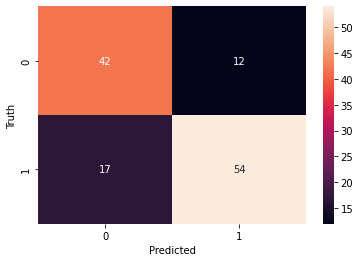

In [61]:
#Heatmap
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [62]:
#Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.78      0.74        54
           1       0.82      0.76      0.79        71

    accuracy                           0.77       125
   macro avg       0.77      0.77      0.77       125
weighted avg       0.77      0.77      0.77       125



In [63]:
#splitting into test and train for BERT
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split (spam_df_final['BERT_output_array'], spam_df_final['label_num'],random_state = 3)

In [64]:
#Fitting a basic Random Forest model
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier()
rf_model1 = rf1.fit(X_train1.tolist(), y_train1)

In [65]:
#Making predictions on the test data 
y_pred1 = rf_model1.predict(X_test1.tolist())

In [66]:
#Calculating precision, recall and accuracy
from sklearn.metrics import precision_score, recall_score
precision1 = precision_score(y_test1, y_pred1)
recall1 = recall_score(y_test1, y_pred1)
print('Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(precision1, 3), round(recall1, 3), round((y_pred1==y_test1).sum()/len(y_pred1), 3)))

Precision: 0.919 / Recall: 0.803 / Accuracy: 0.848


In [67]:
#Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
cm1 = confusion_matrix(y_test1, y_pred1)
cm1

array([[49,  5],
       [14, 57]])

Text(33.0, 0.5, 'Truth')

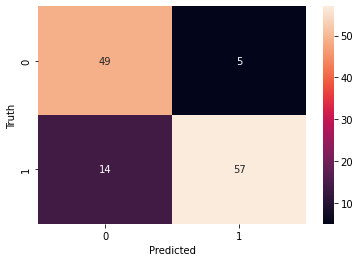

In [68]:
#Heatmap
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm1, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [69]:
#Classification report
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84        54
           1       0.92      0.80      0.86        71

    accuracy                           0.85       125
   macro avg       0.85      0.86      0.85       125
weighted avg       0.86      0.85      0.85       125



In [70]:
#splitting into test and train for ALBERT
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split (spam_df_final['ALBERT_output_array'], spam_df_final['label_num'],random_state = 3)

In [71]:
#Fitting a basic Random Forest model
from sklearn.ensemble import RandomForestClassifier
rf2 = RandomForestClassifier()
rf_model2 = rf2.fit(X_train2.tolist(), y_train2)

In [72]:
#Making predictions on the test data 
y_pred2 = rf_model2.predict(X_test2.tolist())

In [73]:
#Calculating precision, recall and accuracy
from sklearn.metrics import precision_score, recall_score
precision2 = precision_score(y_test2, y_pred2)
recall2 = recall_score(y_test2, y_pred2)
print('Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(precision2, 3), round(recall2, 3), round((y_pred2==y_test2).sum()/len(y_pred2), 3)))

Precision: 0.892 / Recall: 0.817 / Accuracy: 0.84


In [74]:
#Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
cm2 = confusion_matrix(y_test2, y_pred2)
cm2

array([[47,  7],
       [13, 58]])

Text(33.0, 0.5, 'Truth')

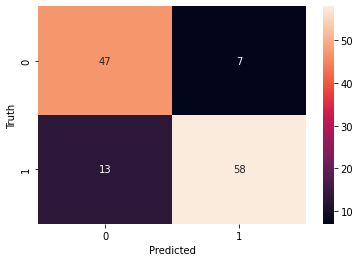

In [75]:
#Heatmap
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm2, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [76]:
#Classification report
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82        54
           1       0.89      0.82      0.85        71

    accuracy                           0.84       125
   macro avg       0.84      0.84      0.84       125
weighted avg       0.85      0.84      0.84       125



In [77]:
#Out of these emeddings, BERT performs the best for this task.

In [103]:
#splitting into test and train for BERT+w2v
from sklearn.model_selection import train_test_split
X_train3, X_test3, y_train3, y_test3 = train_test_split (spam_df_final['BERT+w2v'], spam_df_final['label_num'],random_state = 3)

In [104]:
#Fitting a basic Random Forest model
from sklearn.ensemble import RandomForestClassifier
rf3 = RandomForestClassifier()
rf_model3 = rf3.fit(X_train3.tolist(), y_train3)

In [105]:
#Making predictions on the test data 
y_pred3 = rf_model3.predict(X_test3.tolist())

In [106]:
#Calculating precision, recall and accuracy
from sklearn.metrics import precision_score, recall_score
precision3 = precision_score(y_test3, y_pred3)
recall3 = recall_score(y_test3, y_pred3)
print('Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(precision3, 3), round(recall3, 3), round((y_pred3==y_test3).sum()/len(y_pred3), 3)))

Precision: 0.838 / Recall: 0.803 / Accuracy: 0.8


In [107]:
#Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
cm3 = confusion_matrix(y_test3, y_pred3)
cm3

array([[43, 11],
       [14, 57]])

Text(33.0, 0.5, 'Truth')

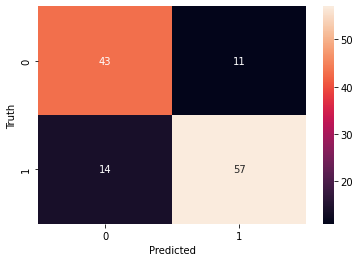

In [108]:
#Heatmap
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm3, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [109]:
#Classification report
print(classification_report(y_test3, y_pred3))

              precision    recall  f1-score   support

           0       0.75      0.80      0.77        54
           1       0.84      0.80      0.82        71

    accuracy                           0.80       125
   macro avg       0.80      0.80      0.80       125
weighted avg       0.80      0.80      0.80       125



In [110]:
#splitting into test and train for BERT+w2v
from sklearn.model_selection import train_test_split
X_train4, X_test4, y_train4, y_test4 = train_test_split (spam_df_final['ALBERT+w2v'], spam_df_final['label_num'],random_state = 3)

In [111]:
#Fitting a basic Random Forest model
from sklearn.ensemble import RandomForestClassifier
rf4 = RandomForestClassifier()
rf_model4 = rf4.fit(X_train4.tolist(), y_train4)

In [112]:
#Making predictions on the test data 
y_pred4 = rf_model4.predict(X_test4.tolist())

In [113]:
#Calculating precision, recall and accuracy
from sklearn.metrics import precision_score, recall_score
precision4 = precision_score(y_test4, y_pred4)
recall4 = recall_score(y_test4, y_pred4)
print('Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(precision4, 3), round(recall4, 3), round((y_pred4==y_test4).sum()/len(y_pred4), 3)))

Precision: 0.862 / Recall: 0.789 / Accuracy: 0.808


In [114]:
#Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
cm4 = confusion_matrix(y_test4, y_pred4)
cm4

array([[45,  9],
       [15, 56]])

Text(33.0, 0.5, 'Truth')

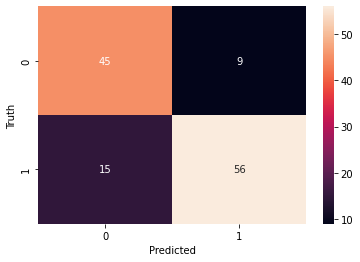

In [115]:
#Heatmap
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm4, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [116]:
#Classification report
print(classification_report(y_test4, y_pred4))

              precision    recall  f1-score   support

           0       0.75      0.83      0.79        54
           1       0.86      0.79      0.82        71

    accuracy                           0.81       125
   macro avg       0.81      0.81      0.81       125
weighted avg       0.81      0.81      0.81       125



In [118]:
#splitting into test and train for ALBERT+BERT
from sklearn.model_selection import train_test_split
X_train5, X_test5, y_train5, y_test5 = train_test_split (spam_df_final['ALBERT+BERT'], spam_df_final['label_num'],random_state = 3)

In [119]:
#Fitting a basic Random Forest model
from sklearn.ensemble import RandomForestClassifier
rf5 = RandomForestClassifier()
rf_model5 = rf5.fit(X_train5.tolist(), y_train5)

In [120]:
#Making predictions on the test data 
y_pred5 = rf_model5.predict(X_test5.tolist())

In [121]:
#Calculating precision, recall and accuracy
from sklearn.metrics import precision_score, recall_score
precision5 = precision_score(y_test5, y_pred5)
recall5 = recall_score(y_test5, y_pred5)
print('Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(precision5, 3), round(recall5, 3), round((y_pred5==y_test5).sum()/len(y_pred5), 3)))

Precision: 0.906 / Recall: 0.817 / Accuracy: 0.848


In [122]:
#Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
cm5 = confusion_matrix(y_test5, y_pred5)
cm5

array([[48,  6],
       [13, 58]])

Text(33.0, 0.5, 'Truth')

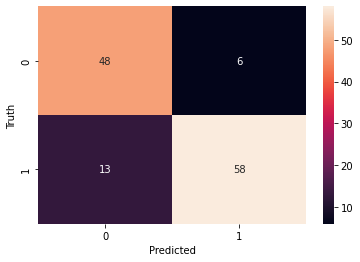

In [123]:
#Heatmap
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm5, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [124]:
#Classification report
print(classification_report(y_test5, y_pred5))

              precision    recall  f1-score   support

           0       0.79      0.89      0.83        54
           1       0.91      0.82      0.86        71

    accuracy                           0.85       125
   macro avg       0.85      0.85      0.85       125
weighted avg       0.85      0.85      0.85       125



In [125]:
#splitting into test and train for ALBERT+BERT
from sklearn.model_selection import train_test_split
X_train6, X_test6, y_train6, y_test6 = train_test_split (spam_df_final['ALL'], spam_df_final['label_num'],random_state = 3)

In [126]:
#Fitting a basic Random Forest model
from sklearn.ensemble import RandomForestClassifier
rf6 = RandomForestClassifier()
rf_model6 = rf6.fit(X_train6.tolist(), y_train6)

In [127]:
#Making predictions on the test data 
y_pred6 = rf_model6.predict(X_test6.tolist())

In [128]:
#Calculating precision, recall and accuracy
from sklearn.metrics import precision_score, recall_score
precision6 = precision_score(y_test6, y_pred6)
recall6 = recall_score(y_test6, y_pred6)
print('Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(precision6, 3), round(recall6, 3), round((y_pred6==y_test6).sum()/len(y_pred6), 3)))

Precision: 0.839 / Recall: 0.732 / Accuracy: 0.768


In [129]:
#Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
cm6 = confusion_matrix(y_test6, y_pred6)
cm6

array([[44, 10],
       [19, 52]])

Text(33.0, 0.5, 'Truth')

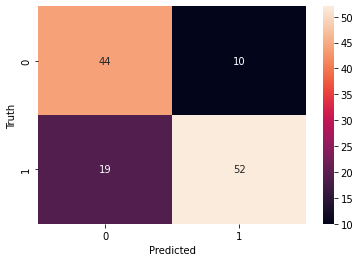

In [131]:
#Heatmap
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm6, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [130]:
#Classification report
print(classification_report(y_test6, y_pred6))

              precision    recall  f1-score   support

           0       0.70      0.81      0.75        54
           1       0.84      0.73      0.78        71

    accuracy                           0.77       125
   macro avg       0.77      0.77      0.77       125
weighted avg       0.78      0.77      0.77       125



In [149]:
#Creating a dataframe out of all the evaluation metrics
data = {"Embedding":['Word2Vec','BERT','ALBERT','BERT+w2v','ALBERT+w2v','ALBERT+BERT','ALL Combined'],
        'Accuracy':[round((y_pred==y_test).sum()/len(y_pred), 3),round((y_pred1==y_test1).sum()/len(y_pred1), 3),round((y_pred2==y_test2).sum()/len(y_pred2), 3),
         round((y_pred3==y_test3).sum()/len(y_pred3), 3),round((y_pred4==y_test4).sum()/len(y_pred4), 3),round((y_pred5==y_test5).sum()/len(y_pred5), 3),
         round((y_pred6==y_test6).sum()/len(y_pred6), 3)],
        'precision':[round(precision, 3),round(precision1, 3),round(precision2, 3),round(precision3, 3),round(precision4, 3),round(precision5, 3),
         round(precision6, 3)],
        'recall':[round(recall, 3),round(recall1, 3),round(recall2, 3),round(recall3, 3),round(recall4, 3),round(recall5, 3),round(recall6, 3)]}
metrics_df = pd.DataFrame(data)  
metrics_df     

,Embedding,Accuracy,precision,recall
0,Word2Vec,0.768,0.818,0.761
1,BERT,0.848,0.919,0.803
2,ALBERT,0.840,0.892,0.817
3,BERT+w2v,0.800,0.838,0.803
4,ALBERT+w2v,0.808,0.862,0.789
5,ALBERT+BERT,0.848,0.906,0.817
6,ALL Combined,0.768,0.839,0.732


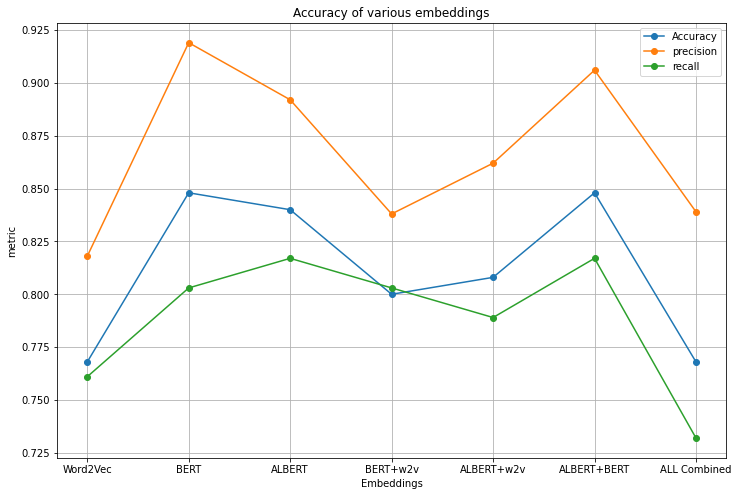

In [158]:
import matplotlib.pyplot as plt
   
Embedding = metrics_df['Embedding']
Accuracy = metrics_df['Accuracy']
precision = metrics_df['precision']
recall = metrics_df['recall']
plt.figure(figsize=(12,8))  
plt.plot(Embedding, Accuracy, marker='o',label = "Accuracy")
plt.plot(Embedding, precision, marker='o', label = "precision")
plt.plot(Embedding, recall, marker='o', label = "recall")
plt.title('Accuracy of various embeddings')
plt.xlabel('Embeddings')
plt.ylabel('metric')
plt.grid(True)
plt.legend()
plt.show()

In [159]:
#We can see that using BERT and ALBERT together gives us meaningful results. Using Albert along with BERT increases recall.
#BERT - contributes towards precision
#ALBERT - contributes towards recall
#Other combinations are not that successful